# This data set contains the following features:
>   
   - Trip Duration (seconds)
   - Start Time and Date
   - End Time and Date
   - Start Station ID
   - Start Station Name
   - Start Station Latitude
   - Start Station Longitude
   - End Station ID
   - End Station Name
   - End Station Latitude
   - End Station Longitude
   - Bike ID
   - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('fivethirtyeight')
%matplotlib inline

# Gather Data

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')

# Assess Data

In [3]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,No


In [4]:
df.shape

(183412, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 19.6+ MB


In [6]:
def missing_value(df):
    mis_val = df.isnull().sum()
    mis_val_precent = (df.isnull().sum() / len(df))*100
    mis_val_table = pd.concat([mis_val,mis_val_precent],axis=1).rename(columns={0:'Missing Values', 1 : '% of Total Values'})
    return mis_val_table
missing_value(df)

,Missing Values,% of Total Values
duration_sec,0,0.000000
start_time,0,0.000000
end_time,0,0.000000
start_station_id,197,0.107408
start_station_name,197,0.107408
start_station_latitude,0,0.000000
start_station_longitude,0,0.000000
end_station_id,197,0.107408
end_station_name,197,0.107408
end_station_latitude,0,0.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000


# Quality
- start time columns type is str and it need to be datetime
- end time columns type is str and it need to be datetime


- Some Columns had missing values
> - start_station_id : 197	missing values
  - start_station_name : 197 missing values
  - end_station_id : 197	missing values
  - end_station_name : 197 missing values


# Clean Data

***Define***
- start time columns type is str and it need to be datetime

**Code**

In [9]:
df.start_time = pd.to_datetime(df.start_time)

**Test**

In [10]:
df.start_time.dtype

dtype('<M8[ns]')

***Define***
- end time columns type is str and it need to be datetime

**Code**

In [11]:
df.end_time = pd.to_datetime(df.end_time)

**Test**

In [12]:
df.end_time.dtype

dtype('<M8[ns]')

***Define***
- Some Columns had missing values
  - start_station_id : 197	missing values
  - start_station_name : 197 missing values
  - end_station_id : 197	missing values
  - end_station_name : 197 missing values
  
**Code**

In [13]:
def fill_missing(col):
    df[col].fillna(df[col].mode().values[0],inplace = True)

In [14]:
fill_missing('start_station_id')
fill_missing('start_station_name')
fill_missing('end_station_id')
fill_missing('end_station_name')

**Test**

In [15]:
missing_value(df)

,Missing Values,% of Total Values
duration_sec,0,0.0
start_time,0,0.0
end_time,0,0.0
start_station_id,0,0.0
start_station_name,0,0.0
start_station_latitude,0,0.0
start_station_longitude,0,0.0
end_station_id,0,0.0
end_station_name,0,0.0
end_station_latitude,0,0.0


***Now the data is clean and ready for analysis***

# Univariate Exploration

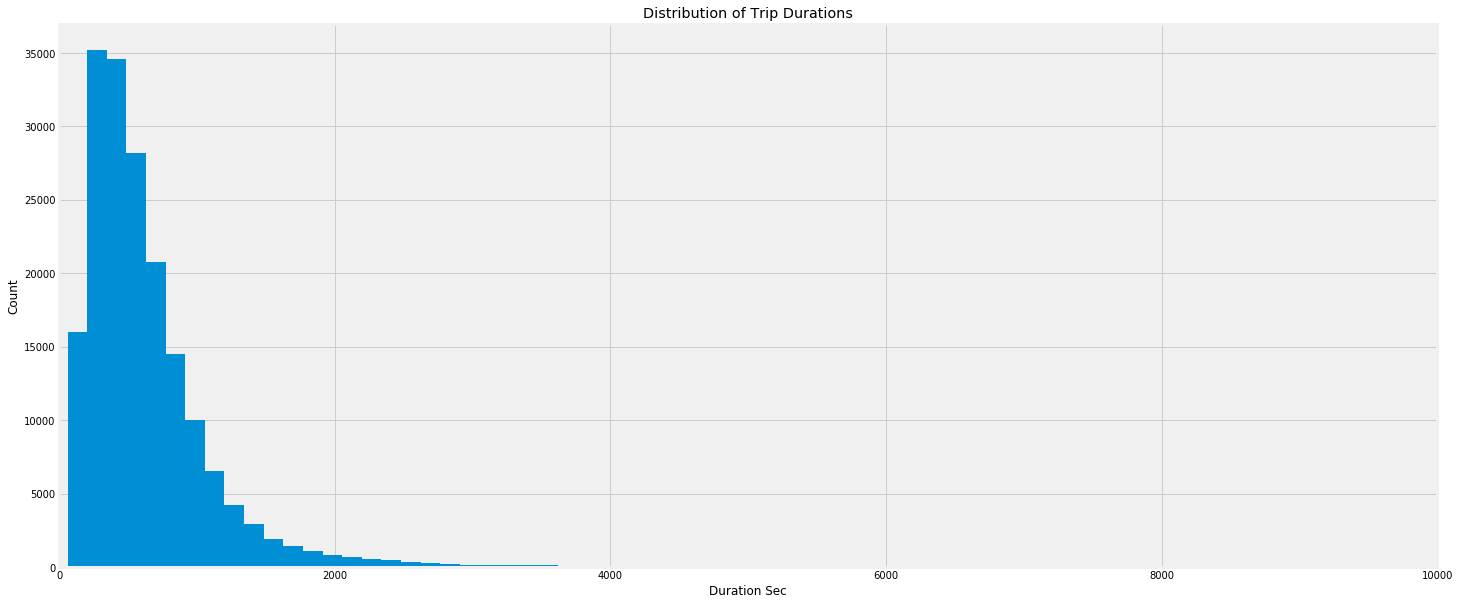

In [16]:
plt.figure(figsize=(22,10))
plt.hist(df.duration_sec,bins=600)
plt.xlim(0,10000)
plt.xlabel('Duration in Sec')
plt.ylabel('Count')
plt.title('Distribution of Trip Durations in sec')
plt.show()

**The Disturbution of duration in sec showing that almost all trips were under 3000 sec and the most of trips took time from 500 sec to 1000 sec which indices that riders uses the system in short time trip**

In [17]:
# make a new column for duration in minutes
df['duration_min'] = df['duration_sec'] / 60

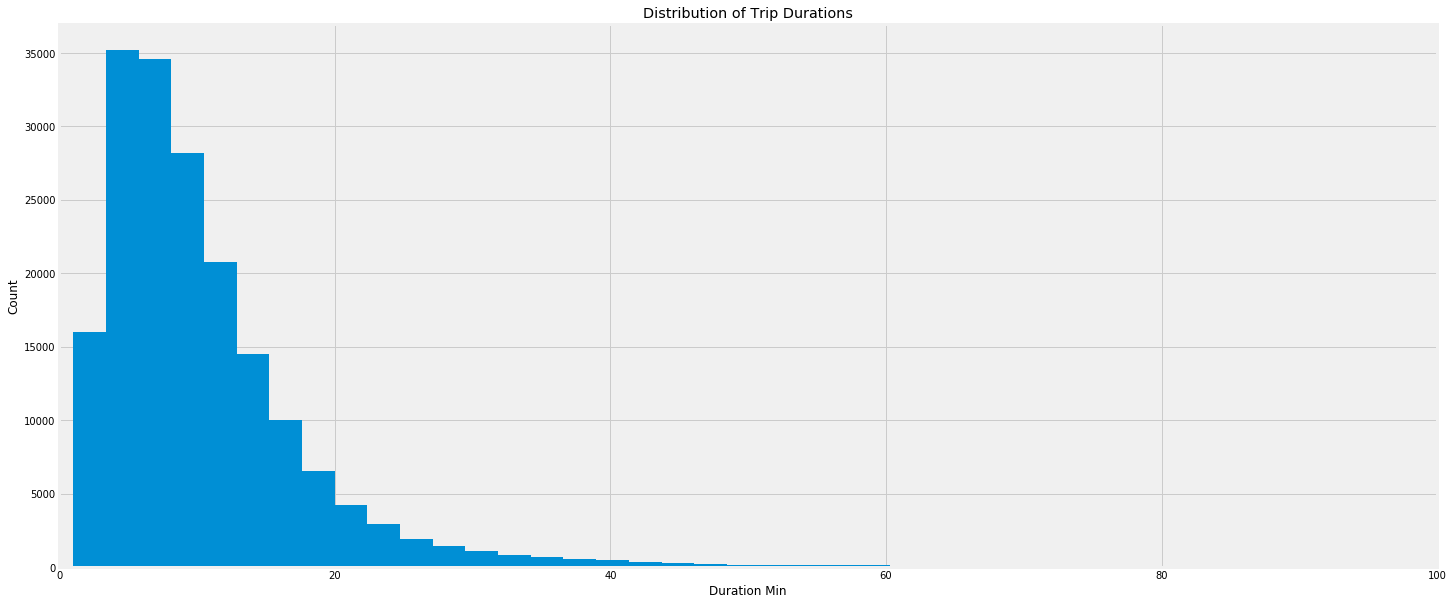

In [18]:
plt.figure(figsize=(22,10))
plt.hist(df.duration_min,bins=600)
plt.xlim(0,100)
plt.xlabel('Duration Min')
plt.ylabel('Count')
plt.title('Distribution of Trip Durations')
plt.show()

**The Disturbution of duration in min showing that almost all trips were under 1 hour which indices that riders uses the system in short time trip**

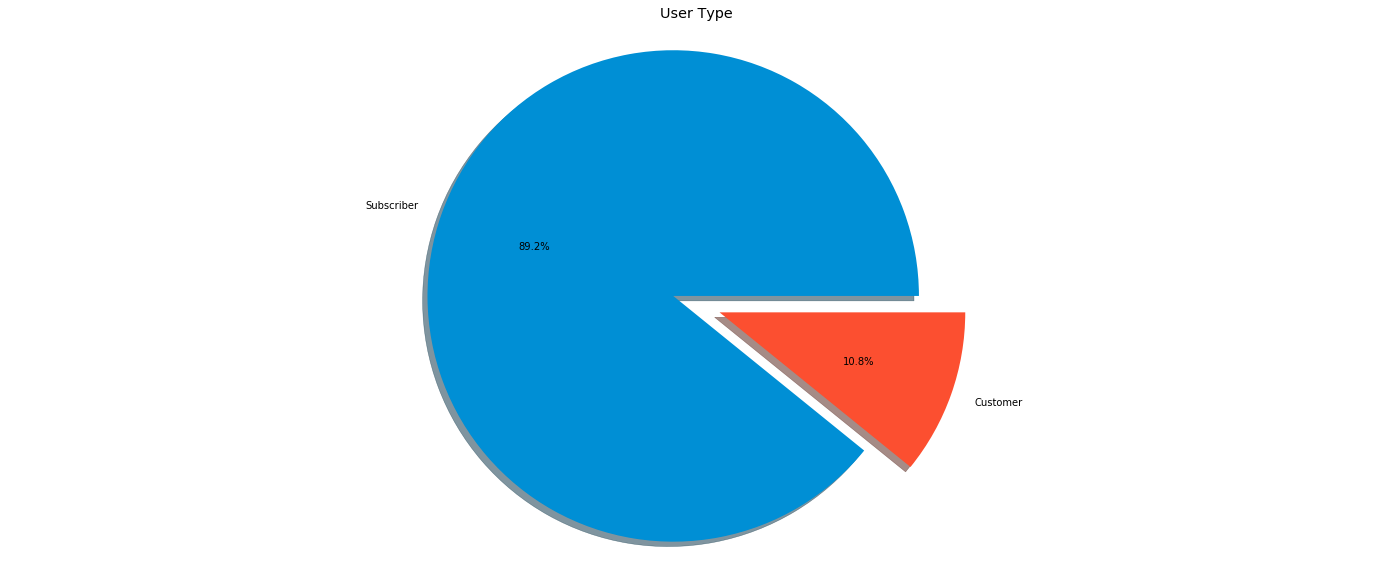

In [19]:
plt.figure(figsize=(22,10))
label=['Subscriber','Customer']
plt.pie(df.user_type.value_counts(),explode=[0.1]*len(label),labels=label,autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('User Type')
plt.show()

**Most riders were Subscriber and a few of them were Customer**

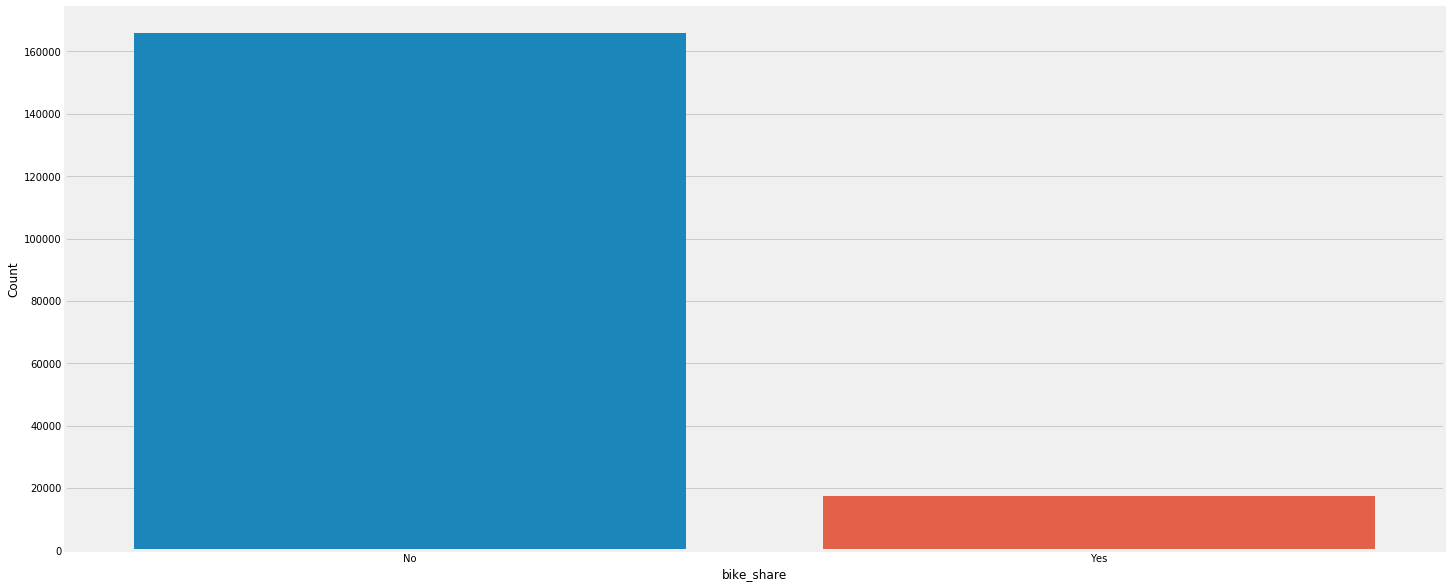

In [20]:
plt.figure(figsize=(22,10))
sb.countplot(data=df, x='bike_share_for_all_trip')
plt.xlabel('bike_share')
plt.ylabel('Count')
plt.show()

**Most riders didn't use bike share and a few of them use it**

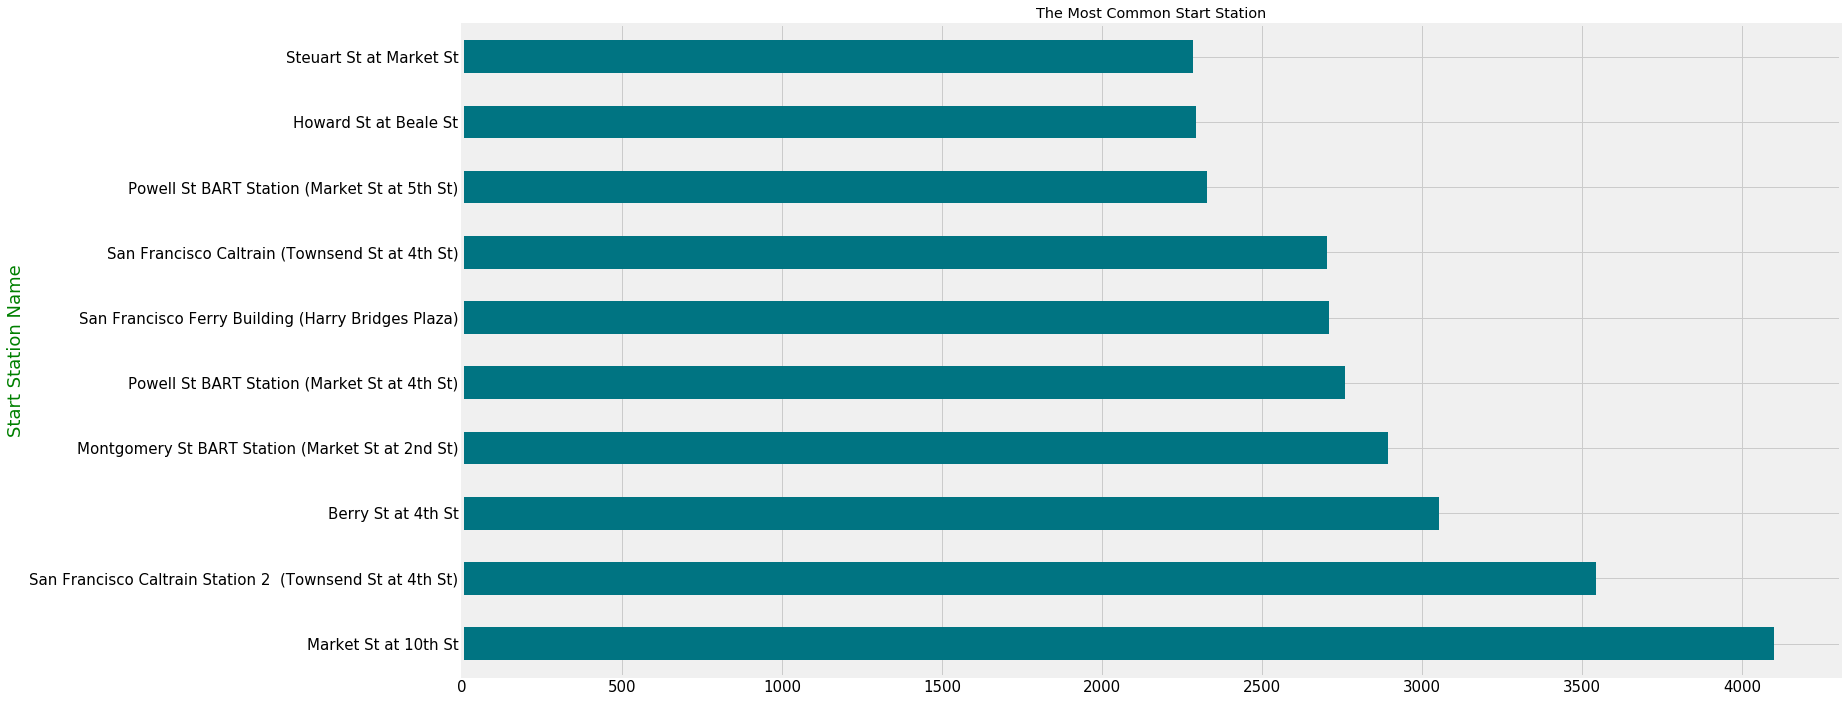

In [21]:
g = df.start_station_name.value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Start Station')

#x-label
ax.set_ylabel('Start Station Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

- The Most used Start Station is
>   
    - Market St at 10th St                                   
    - San Francisco Caltrain Station 2  (Townsend St at 4th St)  
    - Berry St at 4th St                                          
    - Montgomery St BART Station (Market St at 2nd St)           
    - Powell St BART Station (Market St at 4th St)              
    - San Francisco Ferry Building (Harry Bridges Plaza)         
    - San Francisco Caltrain (Townsend St at 4th St)             
    - Powell St BART Station (Market St at 5th St)                 
    - Howard St at Beale St                                        
    - Steuart St at Market St     

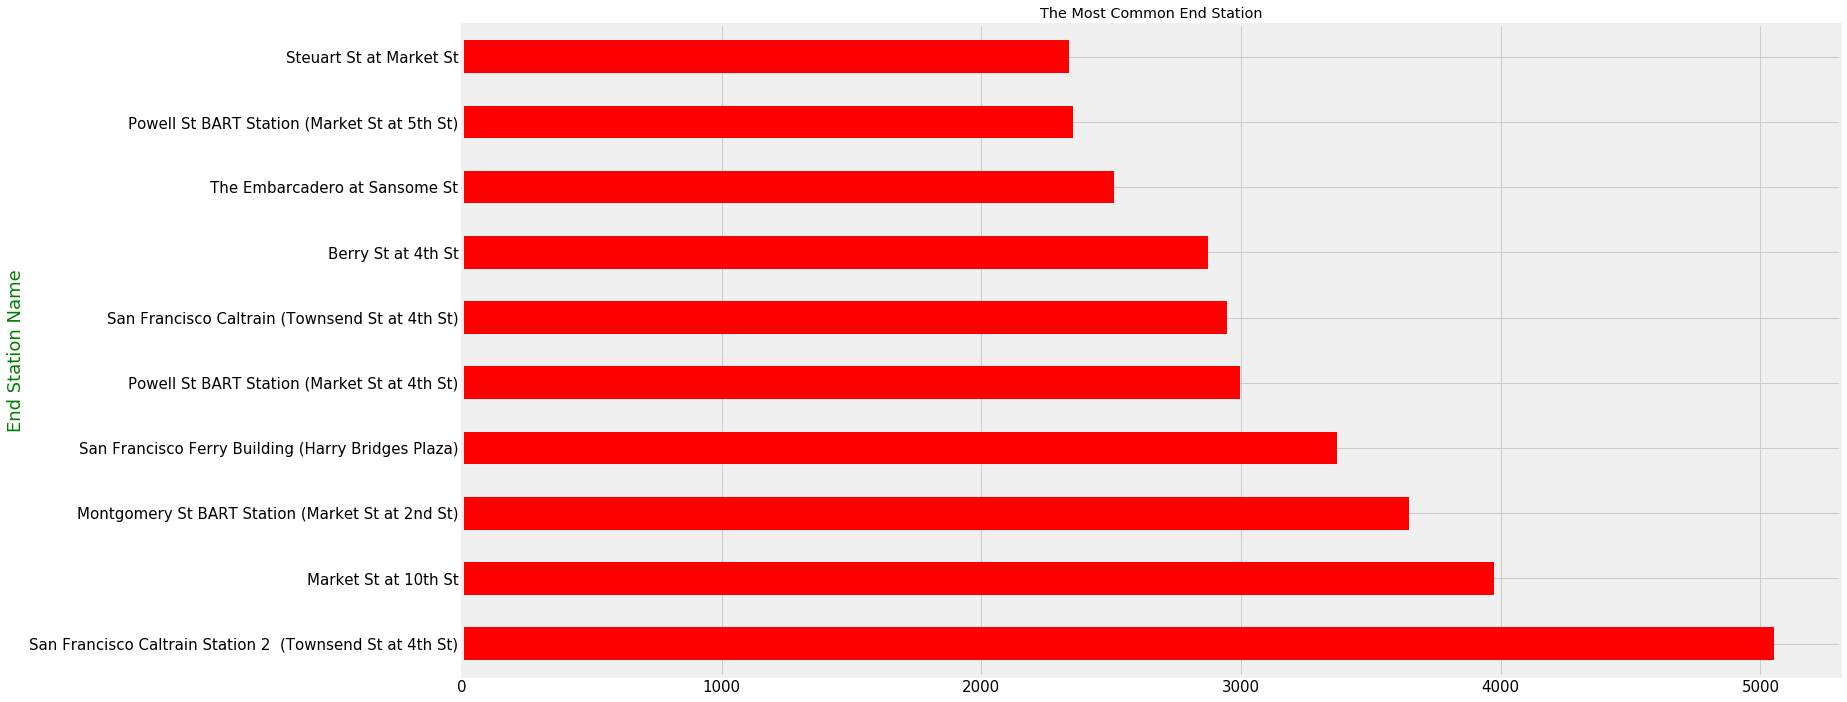

In [22]:
g = df.end_station_name.value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = 'red', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common End Station')

#x-label
ax.set_ylabel('End Station Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

- The Most used End Station is
>   -  San Francisco Caltrain Station 2  (Townsend St at 4th St)                                   
    - Market St at 10th St 
    - Montgomery St BART Station (Market St at 2nd St)                                          
    - San Francisco Ferry Building (Harry Bridges Plaza)           
    - Powell St BART Station (Market St at 4th St)              
    - San Francisco Caltrain (Townsend St at 4th St)  
    - Berry St at 4th St               
    - The Embarcadero at Sansome St                  
    - Powell St BART Station (Market St at 5th St)                                 
    - Steuart St at Market St 

In [23]:
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

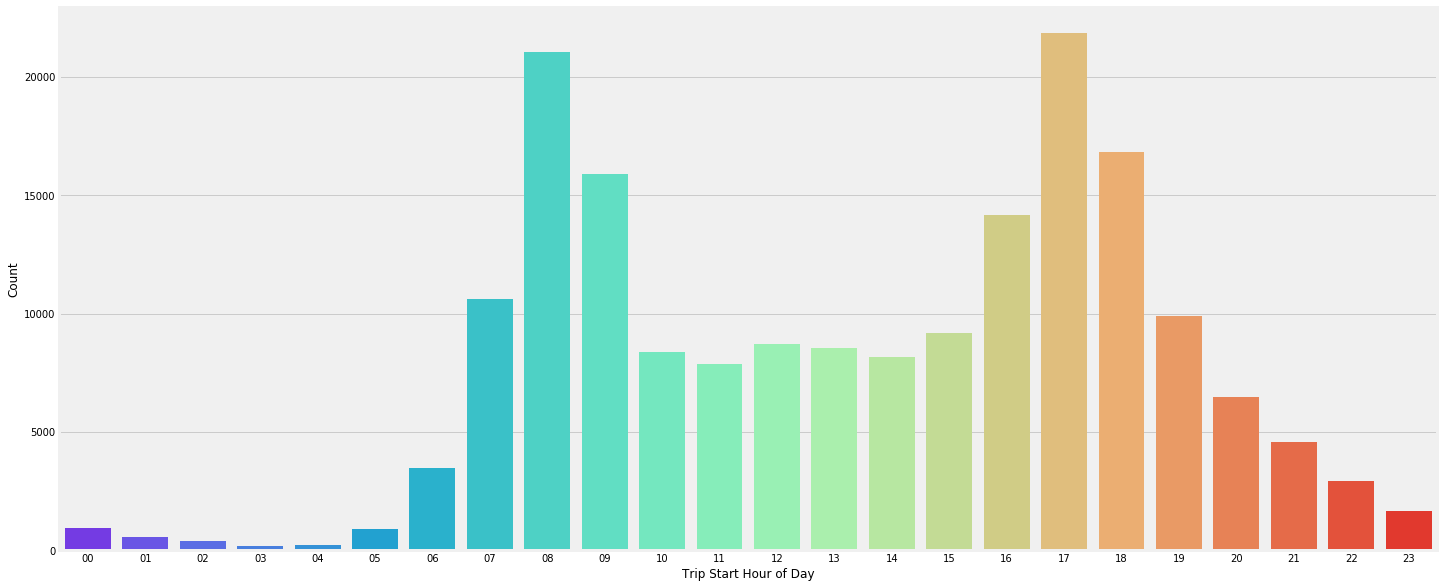

In [24]:
plt.figure(figsize=(22, 10))
sb.countplot(data=df, x='start_hourofday',palette='rainbow')
plt.xlabel('Start Hour of Day')
plt.ylabel('Count')
plt.show()

**The most used start time for clients were between 7 to 9 and 16 to 19 which mean that most of clients uses the bikes when they are going to the work or when they are back.**

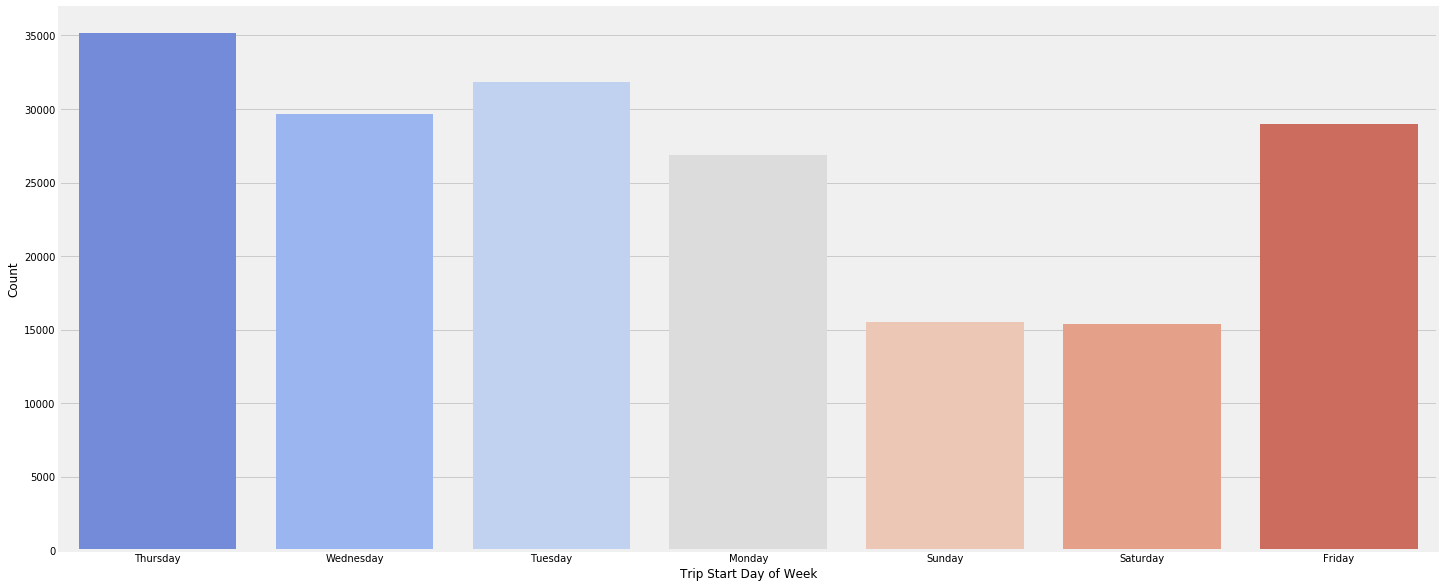

In [25]:
plt.figure(figsize=(22, 10))
sb.countplot(data=df, x='start_dayofweek',palette='coolwarm')
plt.xlabel('Start Day of Week')
plt.ylabel('Count')
plt.show()

**There was drop in the use of system in weekend and large use in work days which emphasis that clients use bikes for commuting**

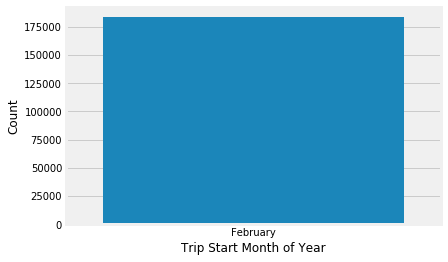

In [26]:
plt.figure(figsize=(6,4))
sb.countplot(data=df, x='start_month')
plt.xlabel('Trip Start Month of Year')
plt.ylabel('Count')
plt.show()

**All the rides happened in February because the data was collected only on that month** 

# Bivariate Exploration

Text(0, 0.5, 'Trip Duration in Minute')

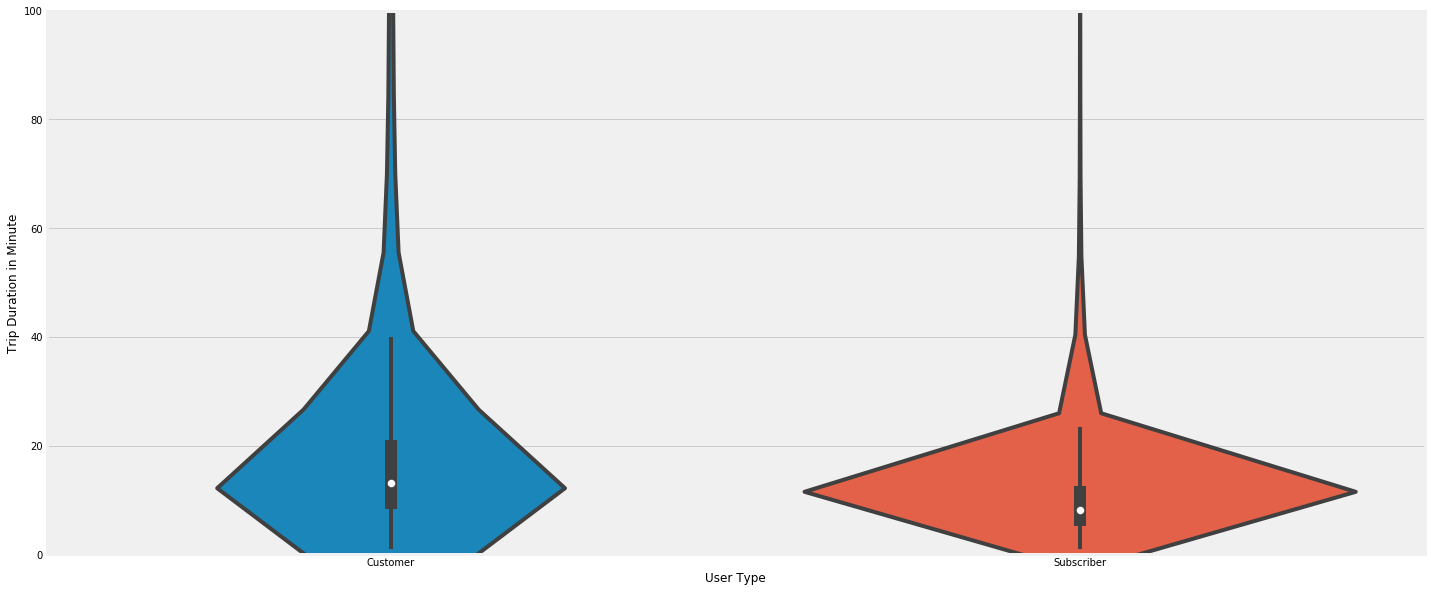

In [27]:
plt.figure(figsize=(22,10))
sb.violinplot(data=df, x='user_type', y='duration_min')
plt.ylim(0,100)
plt.xlabel('User Type')
plt.ylabel('Duration in Minute')

**we can see that higher percentage of customer rides longer trips then subscriber although number of subscriber riders are very high then customer.**

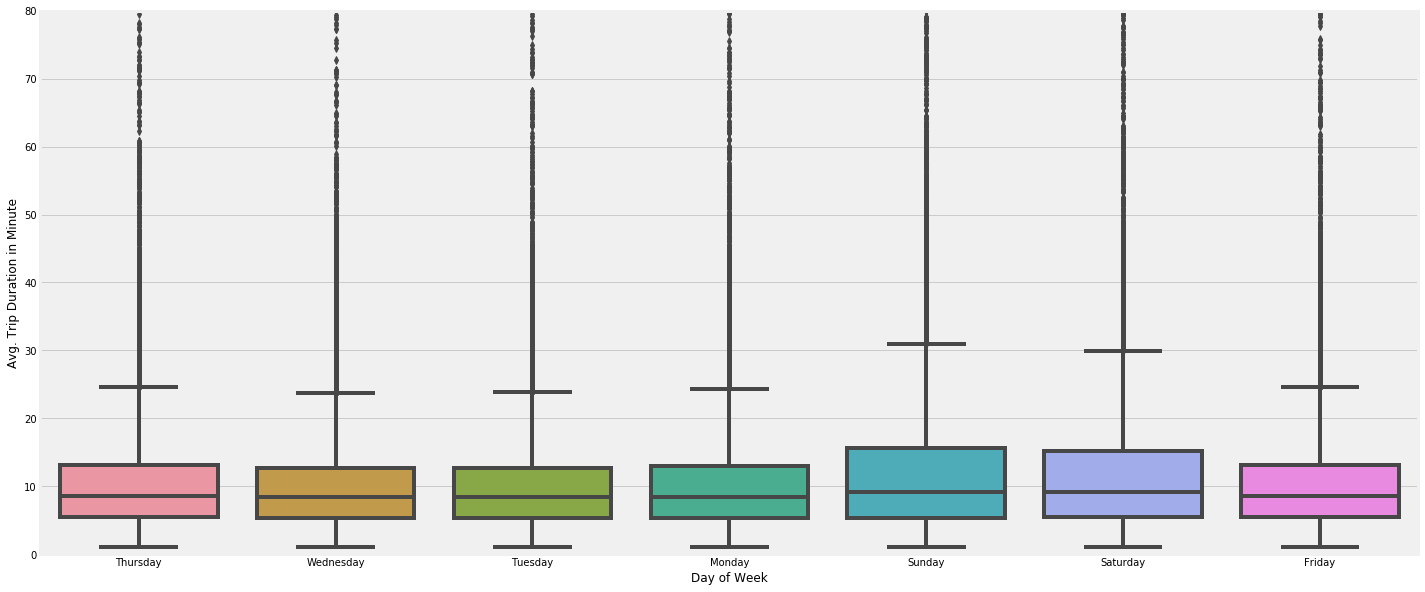

In [28]:
plt.figure(figsize=(22,10))
sb.boxplot(data=df, x='start_dayofweek', y='duration_min')
plt.ylim(0,80)
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')
plt.show()

**The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.**

Text(0, 0.5, 'Avg. Trip Duration in Minute')

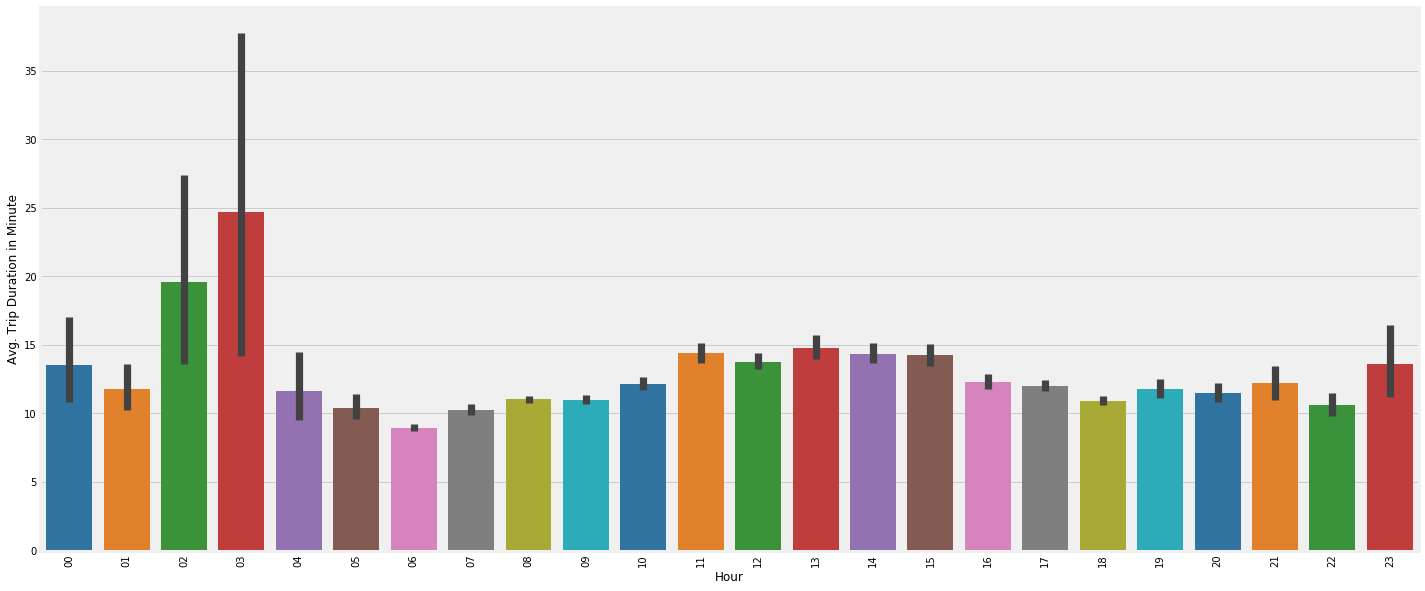

In [29]:
plt.figure(figsize=(22,10))
sb.barplot(data=df, x='start_hourofday', y='duration_min',palette='tab10')
plt.xticks(rotation=90)
plt.xlabel('Hour')
plt.ylabel('Avg. Trip Duration in Minute')

**The trip distribution over day hours peaks around two timeframes, 2am to 3am and 13pm to 15pm.**

Text(0, 0.5, 'Number of Bike Trips')

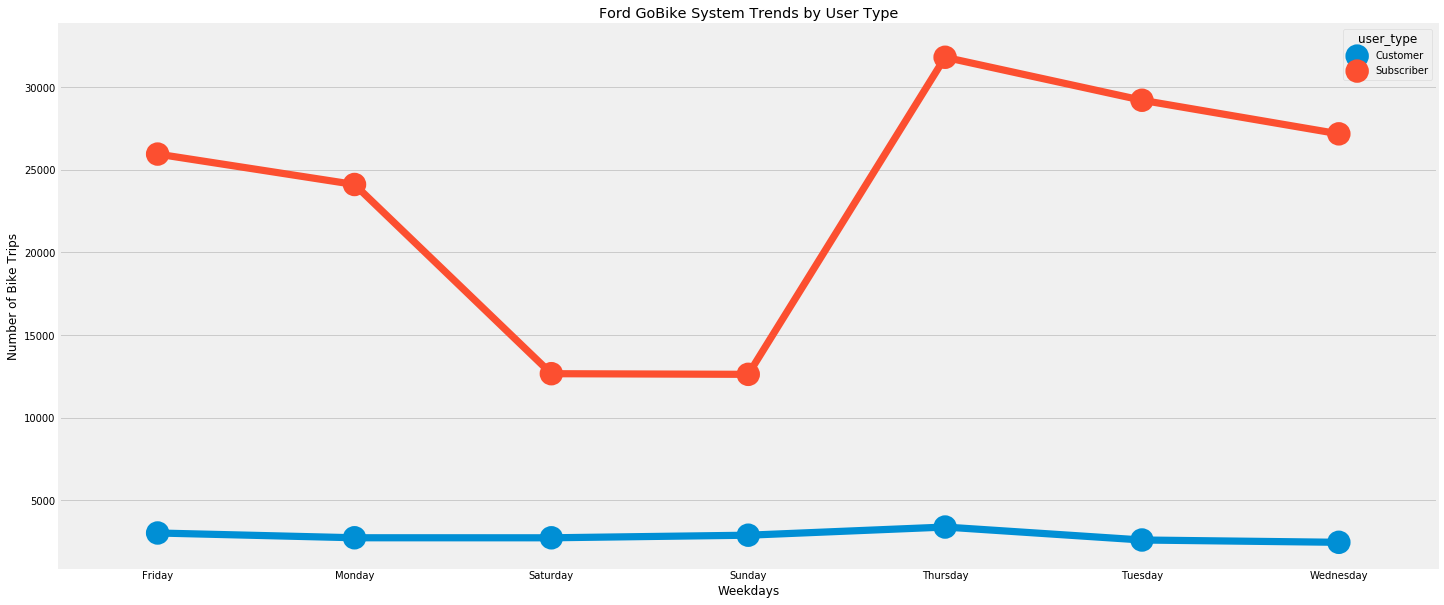

In [30]:
plt.figure(figsize=(22, 10))
df_user_week = df.groupby(['start_dayofweek', 'user_type']).size().reset_index()
ax = sb.pointplot(data=df_user_week, x='start_dayofweek', y=0, hue = 'user_type')
plt.title('Ford GoBike System Trends by User Type')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')

**The point plot above showing that the contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend**

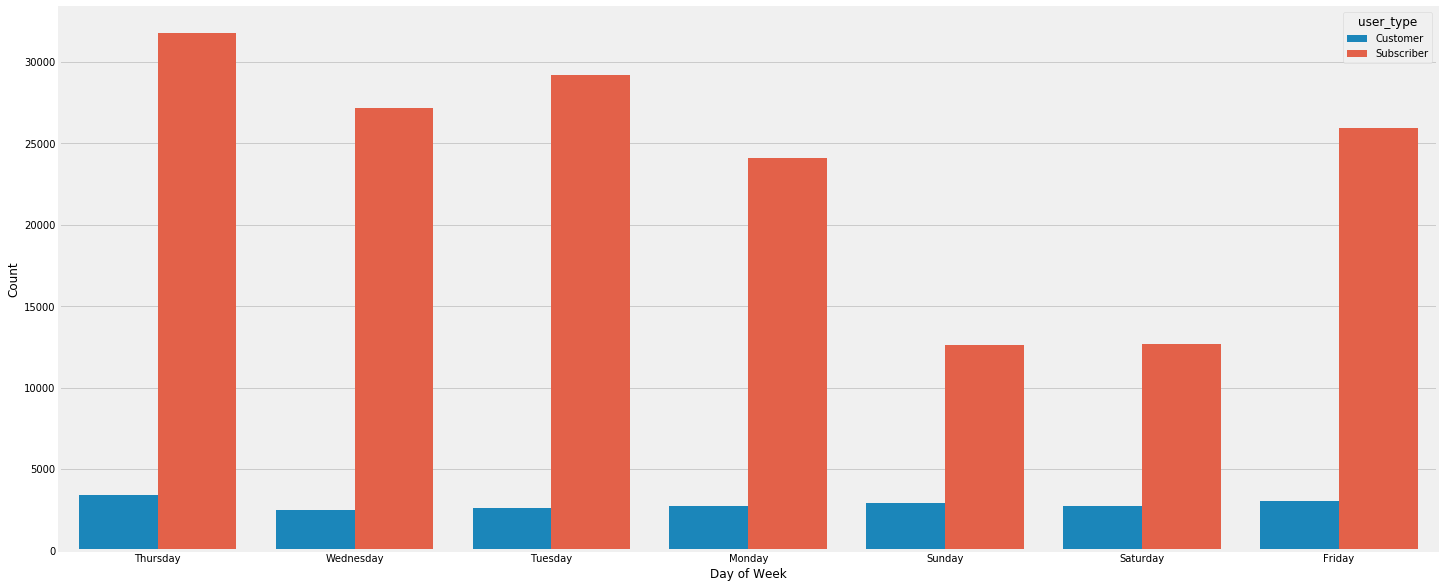

In [31]:
plt.figure(figsize=(22, 10))
sb.countplot(data=df, x='start_dayofweek', hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

**There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.** 

# Multivariate Exploration

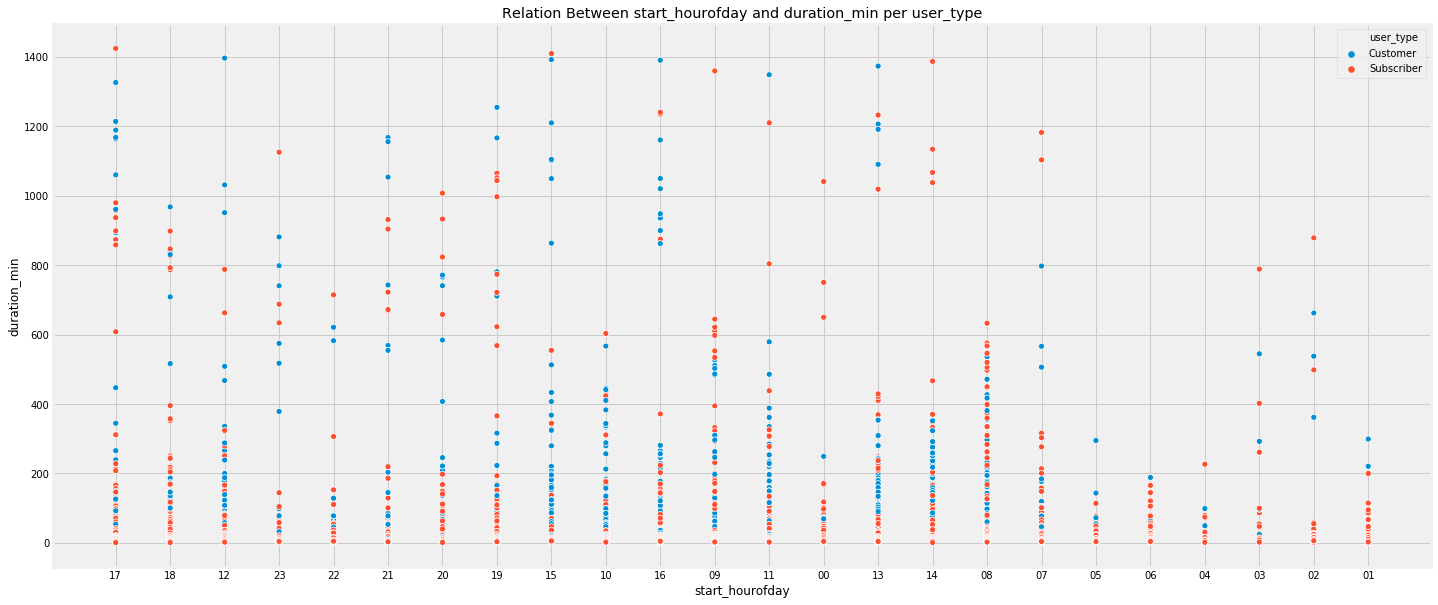

In [32]:
plt.figure(figsize=(22,10))
sb.scatterplot(data = df , x='start_hourofday' , y = 'duration_min',hue='user_type')
plt.title('Relation Between start_hourofday and duration_min per user_type')
plt.show()

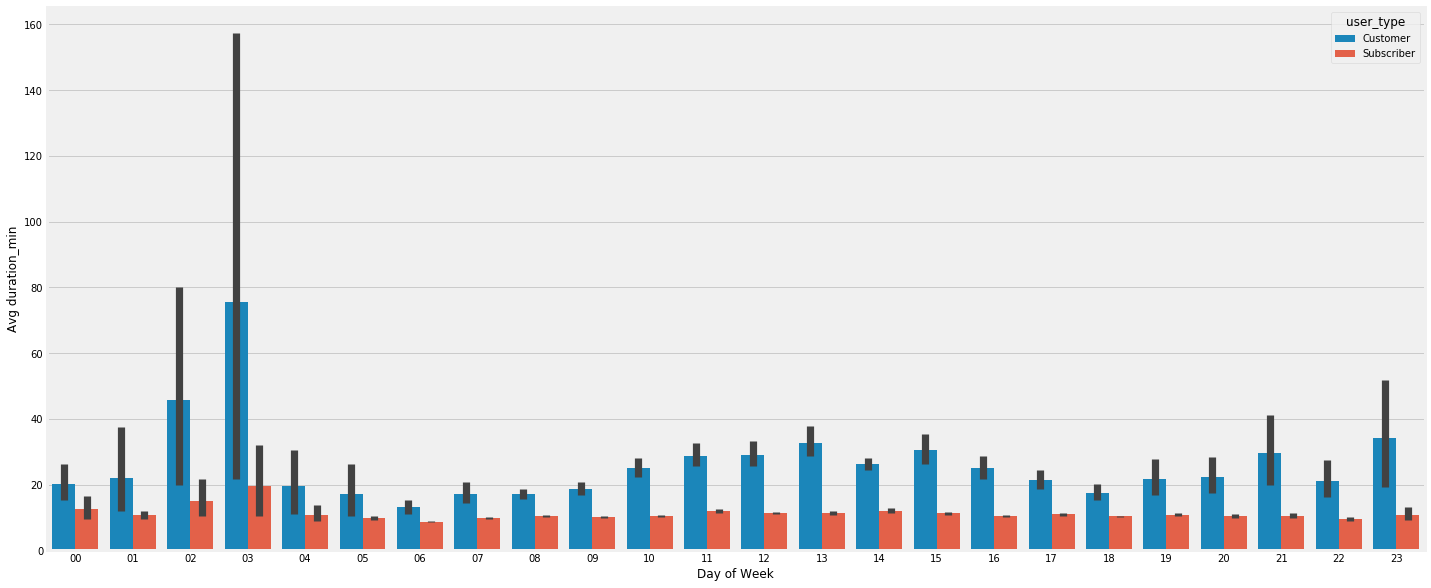

In [33]:
plt.figure(figsize=(22, 10))
sb.barplot(data=df, x='start_hourofday', y = 'duration_min',hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Avg duration_min')
plt.show()

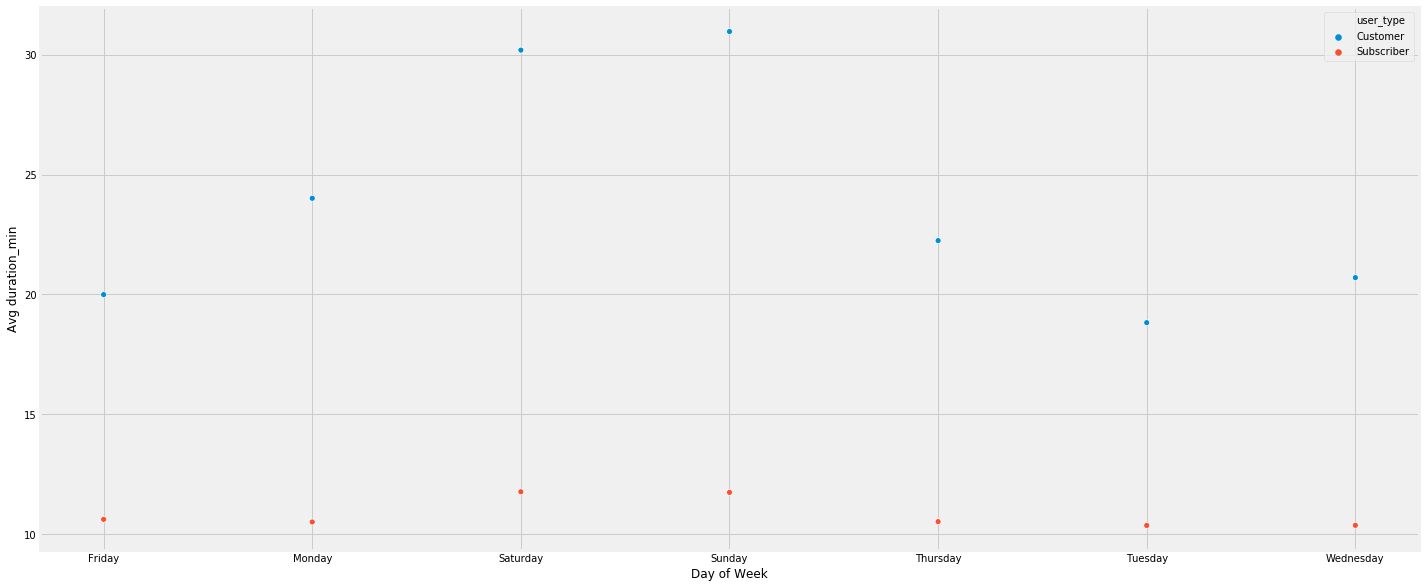

In [34]:
df_day = df.groupby(['start_dayofweek','user_type'],as_index=False)['duration_min'].mean()
plt.figure(figsize=(22, 10))
sb.scatterplot(data = df_day , x='start_dayofweek', y = 'duration_min',hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Avg duration_min')
plt.show()

**The above two plots showing that Subsciber usually use bike for short time trip while Customer usually use it for long trip  and the common start time for Customer between 13 to 15.**

**Both the Subsciber and the Customer take the bikes in long trip on Saturday and Monday**


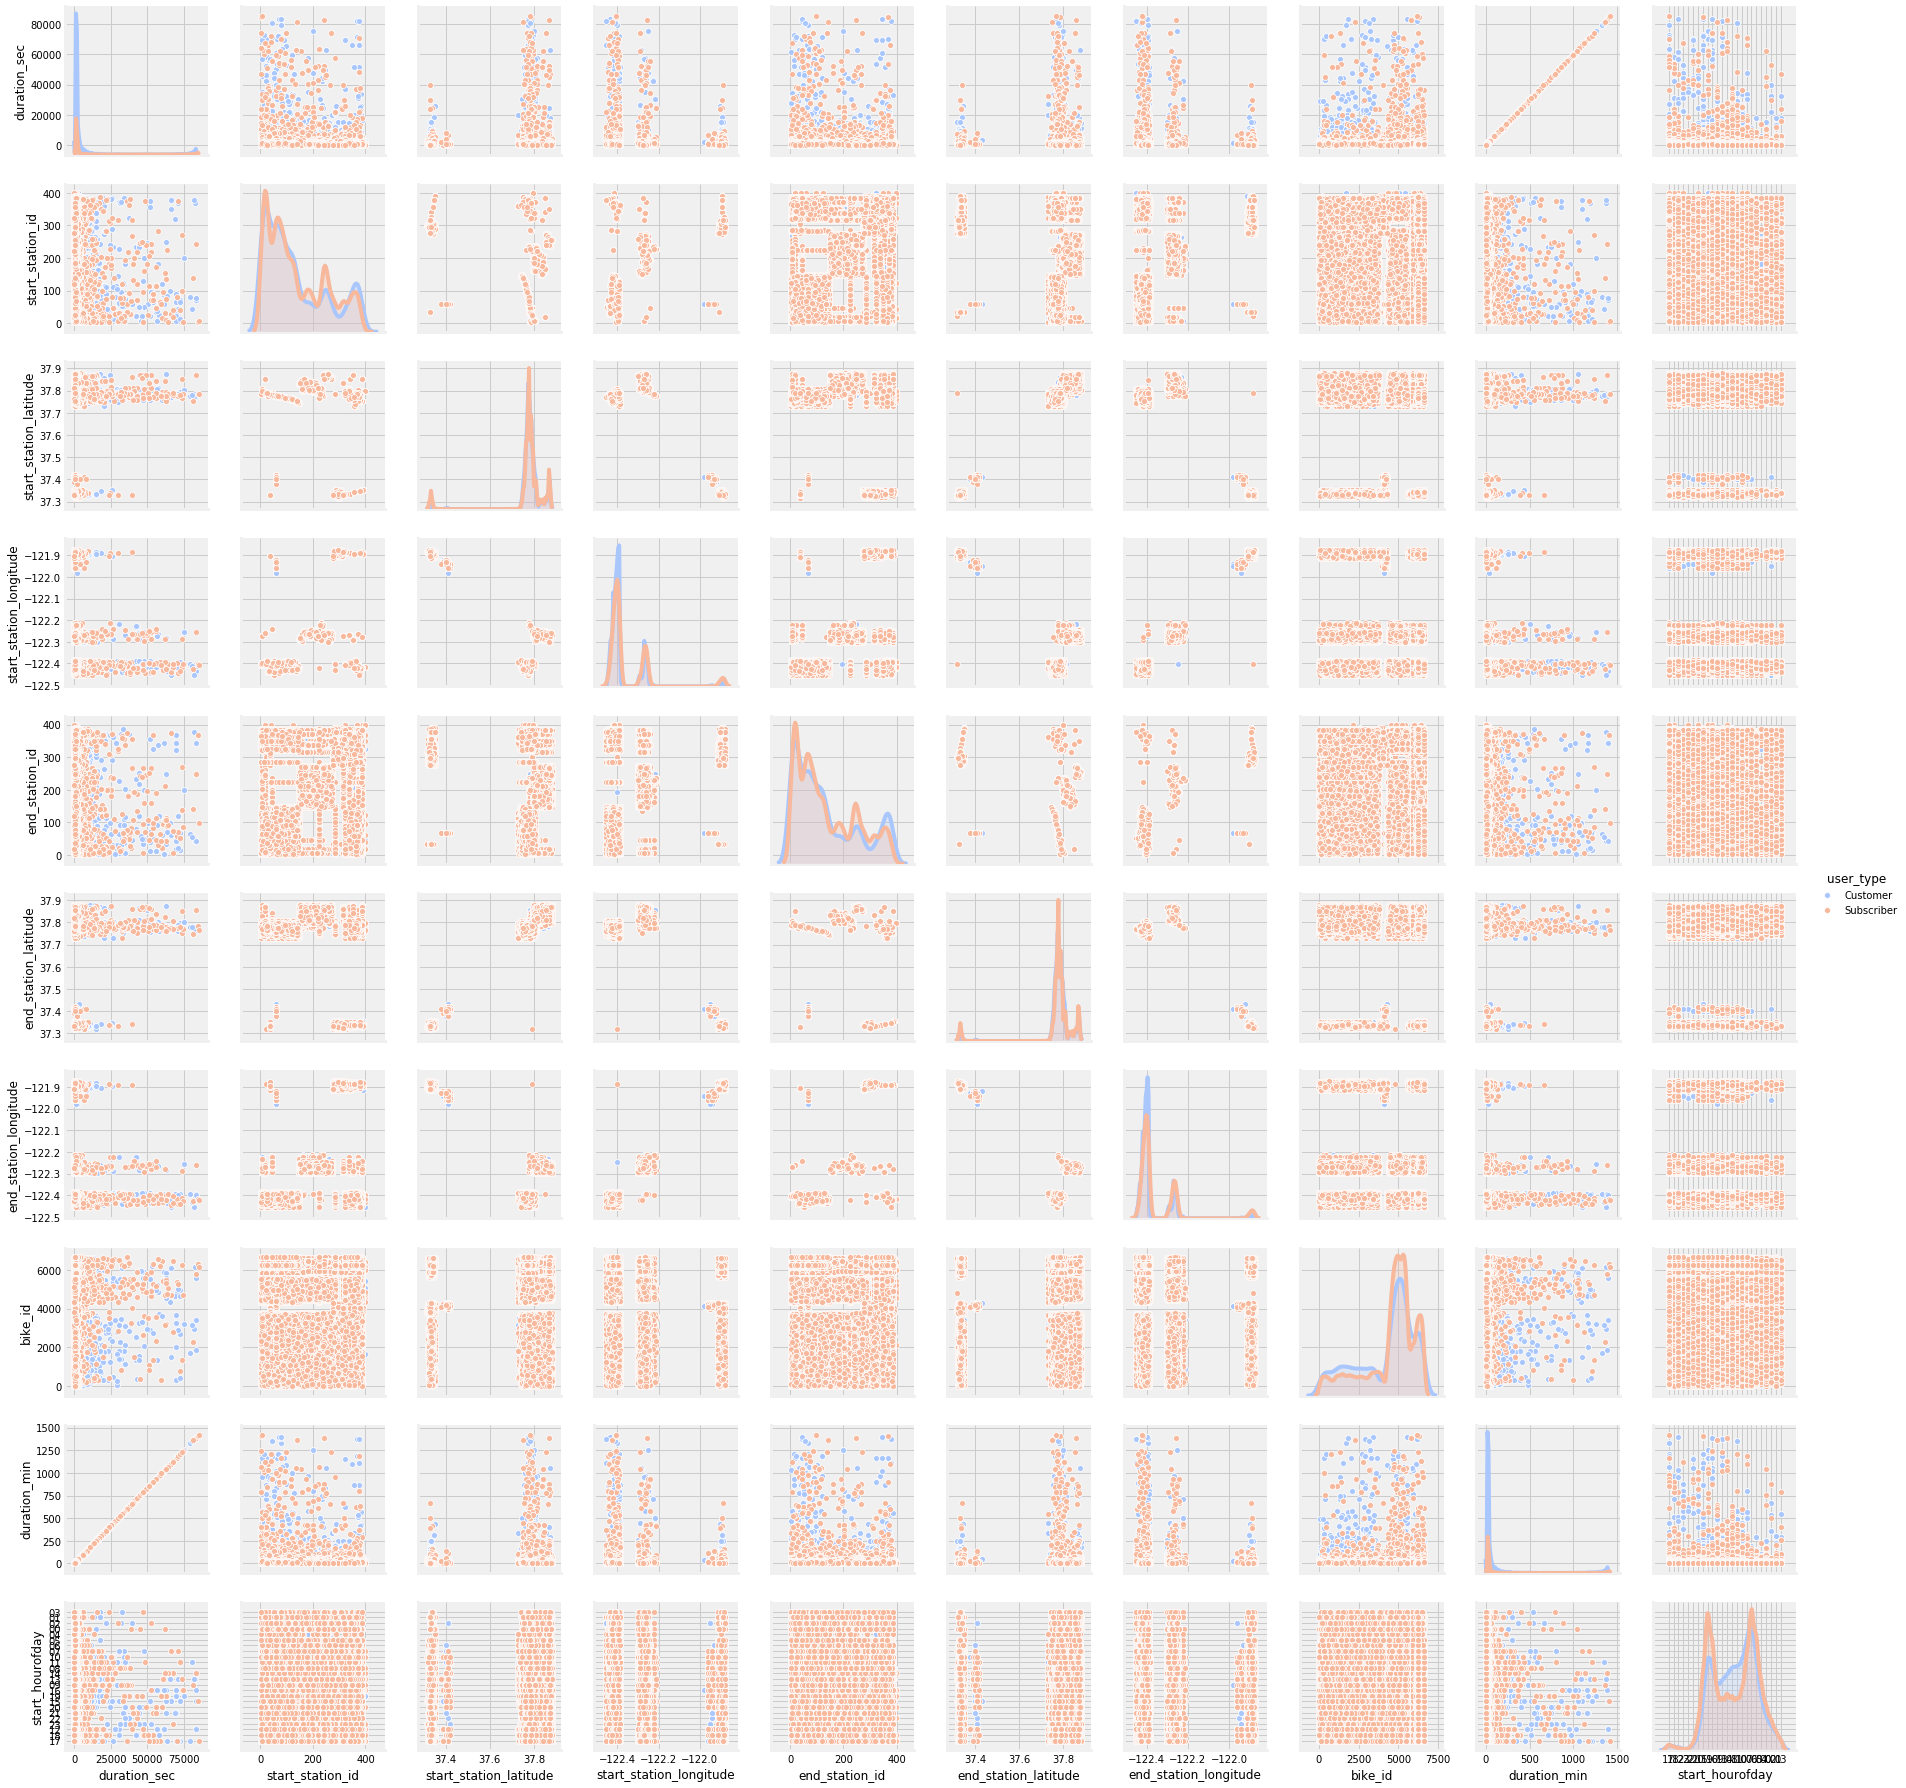

In [36]:
sb.pairplot(df,hue='user_type',palette='coolwarm')

# Sources
- https://matplotlib.org/
- https://seaborn.pydata.org/
- https://github.com/NCH1210/Project-Communicate-Data/blob/master/exploration_template.ipynb (i used this notebook as a help for me through the project and i didn't copy past any thing just take it as a reference)